# 1 PRE PROCESSING DATA

In [1]:
import pandas as pd
import email

In [2]:
df = pd.read_csv('/Users/spartan/Downloads/CS267-Final/output.csv')

In [3]:
df.head()

,File Path,Content
0,/Users/spartan/Downloads/maildir/.DS_Store,NaN
1,/Users/spartan/Downloads/maildir/arnold-j/.DS_...,NaN
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...
3,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...
4,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...


In [4]:
df=df.dropna()
df = df.reset_index(drop=True)
df.head()

,File Path,Content
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...
3,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29084893.1075849630138.JavaMail.e...
4,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <30248874.1075857584813.JavaMail.e...


In [5]:
print(df.loc[0]['Content'])

Message-ID: <17334447.1075857585446.JavaMail.evans@thyme>
Date: Thu, 16 Nov 2000 09:30:00 -0800 (PST)
From: msagel@home.com
To: jarnold@enron.com
Subject: Status
Mime-Version: 1.0
Content-Type: text/plain; charset=ANSI_X3.4-1968
Content-Transfer-Encoding: 7bit
X-From: "Mark Sagel" <msagel@home.com>
X-To: "John Arnold" <jarnold@enron.com>
X-cc: 
X-bcc: 
X-Folder: \\John_Arnold_Dec2000\\Notes Folders\\Notes inbox
X-Origin: Arnold-J
X-FileName: Jarnold.nsf

John:
?
I'm not really sure what happened between us.? I was  under the impression 
after my visit to Houston that we were about to enter into  a trial agreement 
for my advisory work.? Somehow,?this never  occurred.? Did I say or do 
something wrong to screw this  up???
?
I don't know if you've blown this whole thing off, but I still  hope you are 
interested in trying?to create an arrangement.? As a  courtesy, here is my 
report from this past weekend.? If you are no longer  interested in my work, 
please tell me so.??Best wishes,
?


In [6]:
def get_field(field, messages):
    return [email.message_from_string(message).get(field) for message in messages]

In [7]:
df['from'] = get_field("X-From", df['Content'])
df['to'] = get_field("X-To", df['Content'])
df['subject'] = get_field("Subject", df['Content'])

In [8]:
df.head()

,File Path,Content,from,to,subject
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts
3,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29084893.1075849630138.JavaMail.e...,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...
4,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <30248874.1075857584813.JavaMail.e...,Caroline Abramo,Mike Grigsby,Harvard Mgmt


In [9]:
def body(messages):
    return [email.message_from_string(message).get_payload() for message in messages]

In [10]:
df['body'] = body(df['Content'])
df.head(3)

,File Path,Content,from,to,subject,body
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."


In [11]:
def employee(file):
    return [string.split("/")[5] for string in file]

In [12]:
def folder(file):
    return [string.split("/")[6] for string in file]

In [13]:
df['employee'] = employee(df['File Path'])
df.head(3)

,File Path,Content,from,to,subject,body,employee
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j


In [14]:
df['folder'] = folder(df['File Path'])
df.head(3)

,File Path,Content,from,to,subject,body,employee,folder
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j,notes_inbox
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j,notes_inbox
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j,notes_inbox


In [15]:

top_20 = df['employee'].value_counts().head(20).reset_index()
top_20.columns = ["Employee_name", "Counts"]


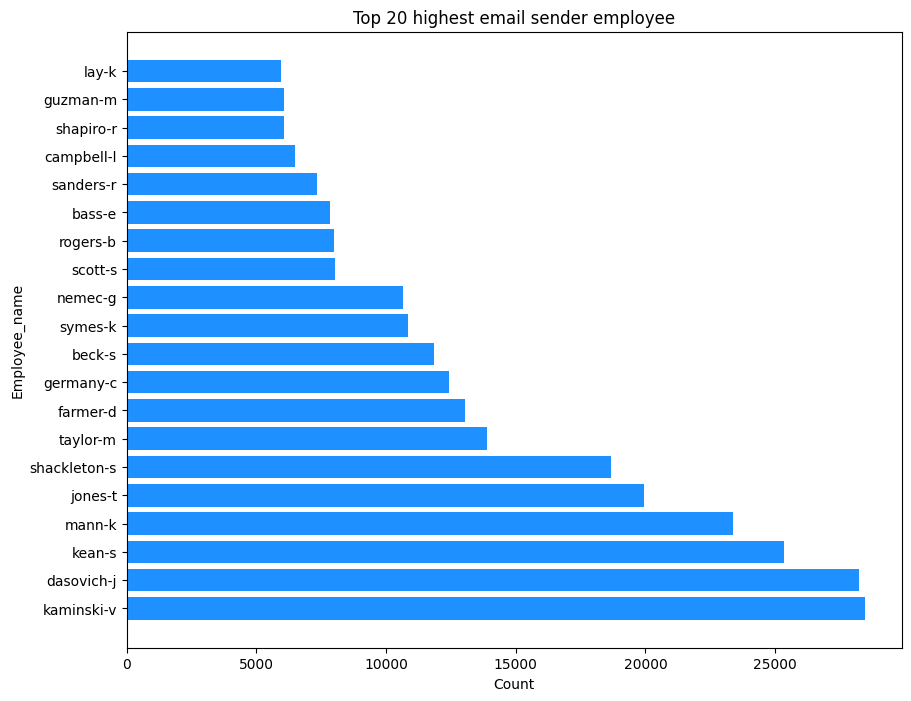

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(top_20['Employee_name'], top_20['Counts'], color='dodgerblue')
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [18]:
import numpy as np

def replace_empty_with_nan(subject):
    return [np.nan if val == "" else val for val in subject]

In [19]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['to'] = replace_empty_with_nan(df['to'])
df['from'] = replace_empty_with_nan(df['from'])

In [20]:
df.head()

,File Path,Content,from,to,subject,body,employee,folder
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j,notes_inbox
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j,notes_inbox
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j,notes_inbox
3,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29084893.1075849630138.JavaMail.e...,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,arnold-j,notes_inbox
4,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <30248874.1075857584813.JavaMail.e...,Caroline Abramo,Mike Grigsby,Harvard Mgmt,Mike- I have their trader coming into the offi...,arnold-j,notes_inbox


In [21]:
df.isnull().sum()

File Path        0
Content          0
from            29
to            9153
subject      19187
body             0
employee         0
folder           0
dtype: int64

In [22]:
df.dropna(axis=0, inplace=True)

In [23]:
df.isnull().sum()

File Path    0
Content      0
from         0
to           0
subject      0
body         0
employee     0
folder       0
dtype: int64

In [24]:
df.head()

,File Path,Content,from,to,subject,body,employee,folder
0,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <17334447.1075857585446.JavaMail.e...,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j,notes_inbox
1,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <19171686.1075857585034.JavaMail.e...,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j,notes_inbox
2,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29887033.1075857630725.JavaMail.e...,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j,notes_inbox
3,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <29084893.1075849630138.JavaMail.e...,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,arnold-j,notes_inbox
4,/Users/spartan/Downloads/maildir/arnold-j/note...,Message-ID: <30248874.1075857584813.JavaMail.e...,Caroline Abramo,Mike Grigsby,Harvard Mgmt,Mike- I have their trader coming into the offi...,arnold-j,notes_inbox


In [25]:
df.drop('File Path', axis=1, inplace=True)
df.drop('Content', axis=1, inplace=True)

In [26]:
df.head()

,from,to,subject,body,employee,folder
0,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j,notes_inbox
1,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j,notes_inbox
2,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j,notes_inbox
3,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,arnold-j,notes_inbox
4,Caroline Abramo,Mike Grigsby,Harvard Mgmt,Mike- I have their trader coming into the offi...,arnold-j,notes_inbox


In [27]:
!pip install wordcloud

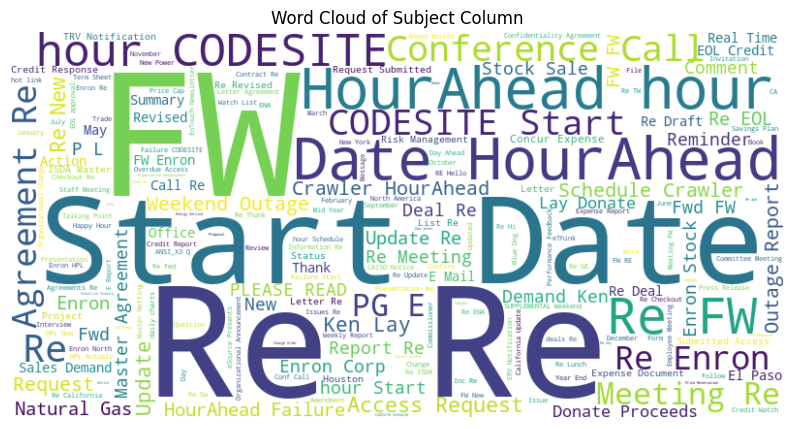

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['subject'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subject Column')
plt.show()


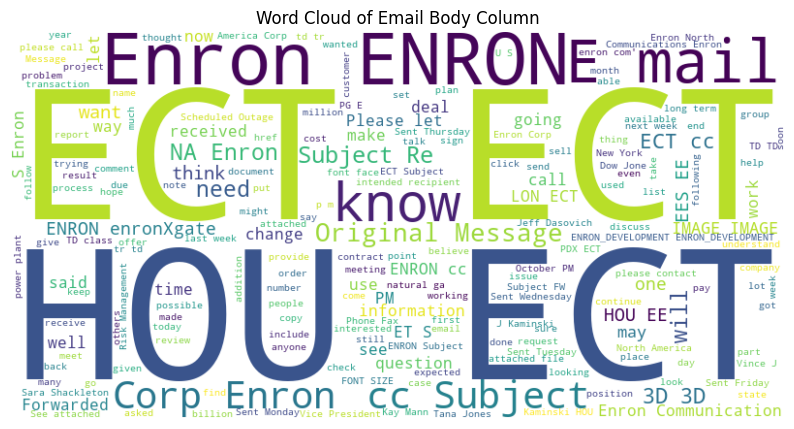

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the 'subject' column

# Concatenate all subjects into a single string
text = ' '.join(df['body'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Body Column')
plt.show()


# 2 CORPUS GENERATION FOR K-CLUSTERING

In [30]:
df.head()

,from,to,subject,body,employee,folder
0,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j,notes_inbox
1,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j,notes_inbox
2,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j,notes_inbox
3,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,arnold-j,notes_inbox
4,Caroline Abramo,Mike Grigsby,Harvard Mgmt,Mike- I have their trader coming into the offi...,arnold-j,notes_inbox


In [31]:
df.shape

(489236, 6)

In [32]:
df['value'] = df['subject'] + " " + df['body'] + " " + df['to'] + " " + df['from']

In [33]:
df.head()

,from,to,subject,body,employee,folder,value
0,"""Mark Sagel"" <msagel@home.com>","""John Arnold"" <jarnold@enron.com>",Status,John:\n?\nI'm not really sure what happened be...,arnold-j,notes_inbox,Status John:\n?\nI'm not really sure what happ...
1,slafontaine@globalp.com,John.Arnold@enron.com,re:summer inverses,i suck-hope youve made more money in natgas la...,arnold-j,notes_inbox,re:summer inverses i suck-hope youve made more...
2,ICE Operations <ICEOperations@intcx.com>,"**ICEHELPDESK <**ICEHELPDESK@intcx.com>, **Int...",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece...",arnold-j,notes_inbox,"The WTI Bullet swap contracts Hi,\n\n\n Foll..."
3,Jeff Youngflesh,"Anthony Gilmore, Colleen Koenig, Jennifer Stew...",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...,arnold-j,notes_inbox,Invitation: EBS/GSS Meeting w/Bristol Babcock ...
4,Caroline Abramo,Mike Grigsby,Harvard Mgmt,Mike- I have their trader coming into the offi...,arnold-j,notes_inbox,Harvard Mgmt Mike- I have their trader coming ...


In [34]:
df.drop(['subject','body','to','from'], axis=1, inplace=True)

In [35]:
df.head()

,employee,folder,value
0,arnold-j,notes_inbox,Status John:\n?\nI'm not really sure what happ...
1,arnold-j,notes_inbox,re:summer inverses i suck-hope youve made more...
2,arnold-j,notes_inbox,"The WTI Bullet swap contracts Hi,\n\n\n Foll..."
3,arnold-j,notes_inbox,Invitation: EBS/GSS Meeting w/Bristol Babcock ...
4,arnold-j,notes_inbox,Harvard Mgmt Mike- I have their trader coming ...


In [36]:
import nltk

In [37]:
import re
import string

def cleanValues(x):
    x = x.lower()
    x = re.sub(r'\n+', ' ', x)
    punctuations = str.maketrans('', '', string.punctuation)
    x = x.translate(punctuations)
    x = re.sub(r'\s+', ' ', x.strip())

    return x


In [38]:
df.loc[:,'value'] = df.loc[:, 'value'].map(cleanValues)

In [39]:
df.head()

,employee,folder,value
0,arnold-j,notes_inbox,status john im not really sure what happened b...
1,arnold-j,notes_inbox,resummer inverses i suckhope youve made more m...
2,arnold-j,notes_inbox,the wti bullet swap contracts hi following the...
3,arnold-j,notes_inbox,invitation ebsgss meeting wbristol babcock nov...
4,arnold-j,notes_inbox,harvard mgmt mike i have their trader coming i...


In [55]:
import pandas as pd
import random

def select_rows_from_random_folders(df, num_mails=15000):
    unique_folders = df['folder'].unique().tolist()
    random_folders = random.sample(unique_folders, k=min(num_mails, len(unique_folders)))
    new_df = df[df['folder'].isin(random_folders)].copy()
    new_df = new_df.head(num_mails)
    new_df.reset_index(drop=True, inplace=True)
    
    return new_df

In [84]:
selected_df = select_rows_from_random_folders(df,15000)

In [85]:
selected_df.shape

(15000, 3)

In [86]:
selected_df.head()

,employee,folder,value
0,arnold-j,notes_inbox,status john im not really sure what happened b...
1,arnold-j,notes_inbox,resummer inverses i suckhope youve made more m...
2,arnold-j,notes_inbox,the wti bullet swap contracts hi following the...
3,arnold-j,notes_inbox,invitation ebsgss meeting wbristol babcock nov...
4,arnold-j,notes_inbox,harvard mgmt mike i have their trader coming i...


In [87]:
import ssl
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [88]:
ssl._create_default_https_context = ssl._create_unverified_context

In [89]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spartan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/spartan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
def get_top_words(df, field, top_n=10):
    text = ' '.join(df[field].tolist())
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    word_counts = Counter(tokens)
    top_words = word_counts.most_common(top_n)

    return top_words


In [91]:
top_words = get_top_words(selected_df, 'value', top_n=20)

In [92]:
print("Top words:")
for word, count in top_words:
    print(f"{word}: {count}")

Top words:
john: 19722
subject: 13859
pm: 12930
enron: 12700
cc: 10322
carol: 10195
please: 9832
st: 7860
kate: 7151
would: 6613
thanks: 6578
2001: 6373
20: 6196
deal: 6109
email: 6029
message: 5974
clair: 5735
sent: 5502
know: 5384
arnold: 5203


In [96]:
def remove_top(text, top_words):
    stop_words = set(stopwords.words('english'))
    stop_words.update(top_words)
    filtered_tokens = [token for token in text.split() if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)


selected_df['value'] = selected_df['value'].apply(lambda x: remove_top(x, top_words))


In [97]:
selected_df.head()

,employee,folder,value
0,arnold-j,notes_inbox,status john im really sure happened us impress...
1,arnold-j,notes_inbox,resummer inverses suckhope youve made money na...
2,arnold-j,notes_inbox,wti bullet swap contracts hi following email r...
3,arnold-j,notes_inbox,invitation ebsgss meeting wbristol babcock nov...
4,arnold-j,notes_inbox,harvard mgmt mike trader coming office tomorro...


# TFIDF

In [98]:
terms=selected_df['value']


In [99]:
print(terms)

0        status john im really sure happened us impress...
1        resummer inverses suckhope youve made money na...
2        wti bullet swap contracts hi following email r...
3        invitation ebsgss meeting wbristol babcock nov...
4        harvard mgmt mike trader coming office tomorro...
                               ...                        
14995    day ahead scheduling opportunity position rece...
14996    training opportunities reminder interested att...
14997    welcome mo elafandi another new addition portl...
14998    hunsuckers farewell many already know brett hu...
14999    volume management opening following position b...
Name: value, Length: 15000, dtype: object


In [125]:
terms.shape

(15000,)

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=500)
tfidf_matrix = vectorizer.fit_transform(terms)

In [108]:
dense_tfidf_matrix = tfidf_matrix.toarray()

In [120]:
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [121]:
tfidf_df.head()

,000,01,09,10,100,100000,11,110000,12,120000,...,whether,williams,within,work,working,would,year,years,yesterday,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.367676,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.061772,0.0,0.0,0.219872,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.103013,0.0,0.0,0.000000,0.0


In [122]:
tfidf_df.shape

(15000, 500)

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dense_tfidf_matrix)
tfidf_reduced = pca.transform(dense_tfidf_matrix)


In [114]:
tfidf_reduced

array([[-0.05311557, -0.11584596],
       [-0.04627722, -0.06049121],
       [-0.00787239,  0.01004905],
       ...,
       [-0.03637498, -0.00163389],
       [-0.03063497, -0.01549587],
       [-0.04453722, -0.04068006]])

In [115]:
pca_result

array([[-0.05311554, -0.11584495],
       [-0.04627706, -0.06049087],
       [-0.00787234,  0.01004908],
       ...,
       [-0.0363749 , -0.00163398],
       [-0.03063509, -0.01549577],
       [-0.04453705, -0.0406798 ]])

In [123]:
pca_result.shape

(15000, 2)

In [110]:
pca_df = pd.DataFrame(data=tfidf_reduced, columns=['PC1', 'PC2'])

In [111]:
pca_df.head()

,PC1,PC2
0,-0.053116,-0.115846
1,-0.046277,-0.060491
2,-0.007872,0.010049
3,-0.027250,-0.034858
4,-0.046257,0.004893


In [112]:
pca_df.to_csv('pca_points.csv', index=False)

# RESULT ANALYSIS

In [129]:
import ast

with open('/Users/spartan/Downloads/CS267_Final_KrishnaMurthy/cluster_data.txt', 'r') as file:
    cluster_labels = [ast.literal_eval(line.strip()) for line in file]

In [137]:
tfidf_df['cluster_label'] = cluster_labels

In [143]:
tfidf_df.head()

,000,01,09,10,100,100000,11,110000,12,120000,...,williams,within,work,working,would,year,years,yesterday,yet,cluster_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.367676,0.0,0.000000,0.0,0.0,0.000000,0.0,"(-0.136, 0.375)"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,"(-0.151, 0.412)"
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.061772,0.0,0.0,0.219872,0.0,"(-0.146, 0.356)"
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,"(-0.167, 0.43)"
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.103013,0.0,0.0,0.000000,0.0,"(-0.161, 0.45)"


In [156]:
cluster_word_stats = tfidf_df.groupby('cluster_label').mean()
top_words_count = 10

In [157]:
top_words_per_cluster = {}
for cluster_label, row in cluster_word_stats.iterrows():
    top_words = row.nlargest(top_words_count).index.tolist()
    top_words_per_cluster[cluster_label] = top_words[:top_words_count]

In [161]:
count = 0
for cluster_label, top_words in top_words_per_cluster.items():
    print(f"Cluster {cluster_label}: {top_words}")
    count += 1
    if count >= 10:
        break

Cluster (-0.297, -0.461): ['kate', 'changed', 'deal', 'hours', 'symes', 'checkout', '20', 'power', 'evelyn', 'thanks']
Cluster (-0.292, -0.406): ['friday', 'enron', '2002', '11', 'january', 'start', 'hope', 'year', 'office', 'look']
Cluster (-0.286, -0.426): ['plan', 'apb', 'november', 'kerri', 'broker', 'ercot', 'kate', 'employees', 'change', 'counterparty']
Cluster (-0.281, -0.375): ['credit', 'enron', '20', 'deals', 'traders', 'confirm', 'business', 'services', 'kate', 'risk']
Cluster (-0.28, -0.405): ['company', 'deal', 'move', 'robert', 'new', 'rhonda', 'delivery', 'bob', 'scott', 'changed']
Cluster (-0.279, -0.433): ['20', 'power', 'issue', 'online', 'nymex', 'trade', 'melissa', 'futures', 'physical', 'get']
Cluster (-0.278, -0.359): ['ercot', 'data', 'services', 'market', 'energy', 'storage', 'click', 'intended', 'enron', 'markets']
Cluster (-0.276, -0.436): ['judy', 'believe', 'susan', 'look', 'take', 'want', 'see', 'one', '000', '01']
Cluster (-0.276, -0.431): ['lisa', 'richar

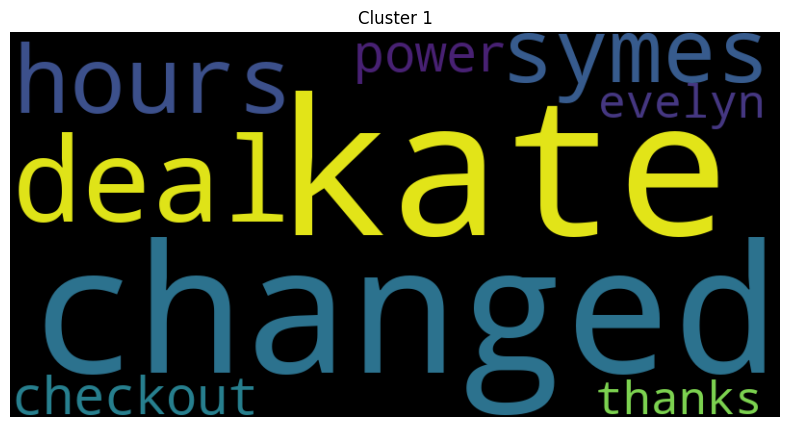

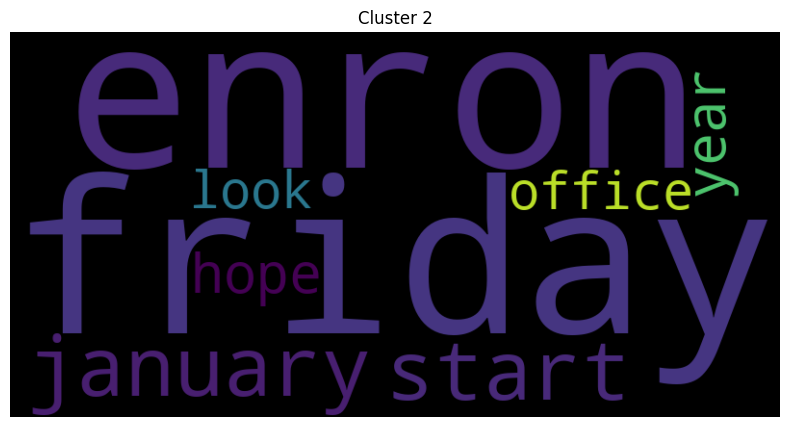

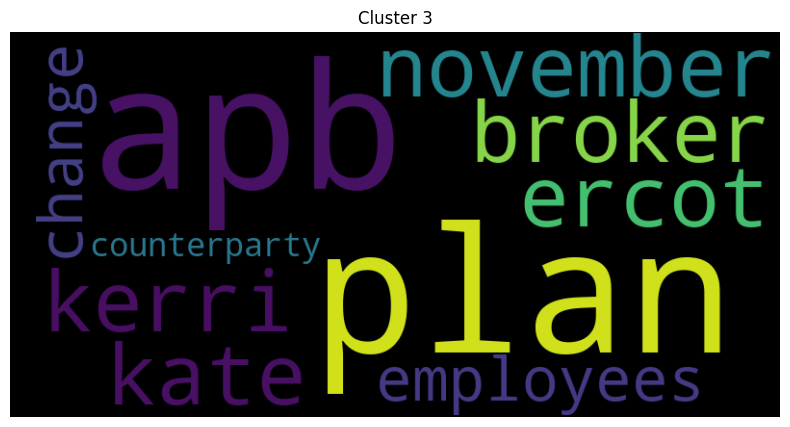

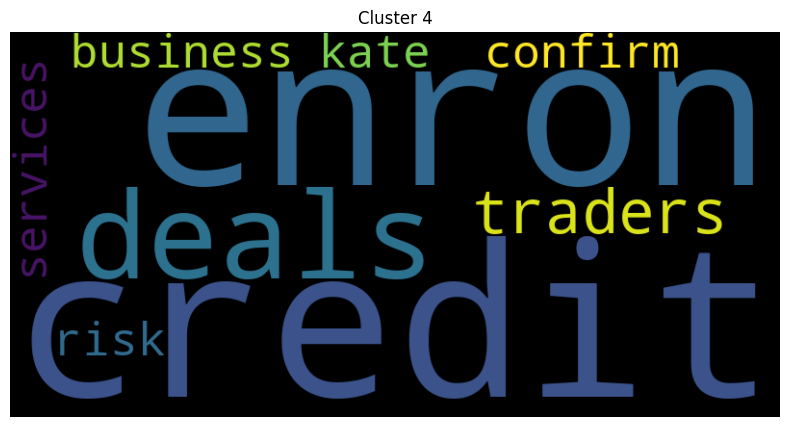

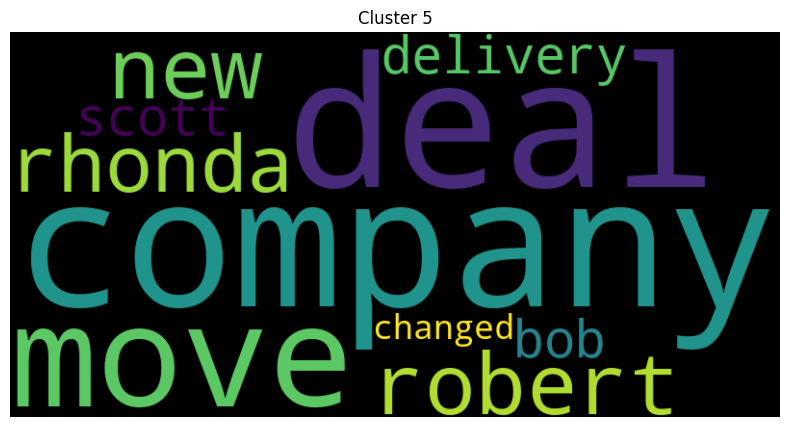

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

count = 0
for cluster_label, top_words in top_words_per_cluster.items():
    count += 1
    if count > 5:
        break

    # Concatenate the words in the current cluster
    text = ' '.join(top_words)

    # Generate word cloud for the current cluster
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # Plot the word cloud with the cluster label as the title
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {count}")
    plt.axis('off')
    plt.show()